In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii 

In [2]:
tab = astropy.io.ascii.read("PS_2020.12.15_09.21.06.csv")

In [3]:
print(tab.colnames)

['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st

Text(0, 0.5, 'Radius [R$_{Jupiter}$]')

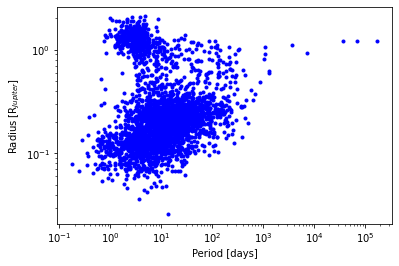

In [4]:
plt.plot(tab["pl_orbper"], tab["pl_radj"], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")

## 1, How about Mass-Period plot, Mass-Semi-major axis plot, etc? How different are they and why? 


## 2, Overplot solar system planets on the above plot?

## 3, Research on the state-of-the-art performance of each detection technique and overplot the sensitivity line. An example of RV is given below.

## $K = \frac{m_p}{m_\ast}\cdot\sqrt{\frac{Gm_\ast}{a}}\cdot\sin i$

## Assuming an edge-on orbit, for which $i$ is 90 degree, rearrange the equation to be:

## $m_p = K \cdot m_\ast \cdot \sqrt{\frac{a}{Gm_\ast}}$

## For a K value of 0.5 m/s, which is the state-of-the-art performance, the mass sensitivity is as follows for a range of semi major axis $a$, assuming 0.5 solar mass:

In [5]:
import astropy.constants as ac
import astropy.units as u

In [6]:
sma_arr = 10.0**(np.arange(5)-2) * u.AU

m_p_arr = 0.5 * u.meter / u.second * 0.5 * u.solMass * np.sqrt(sma_arr / ac.G / (0.5 * u.solMass))



Text(0, 0.5, 'Mass [R$_{Earth}$]')

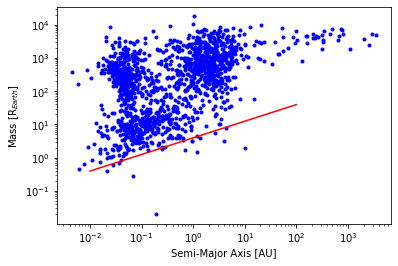

In [7]:
plt.plot(tab["pl_orbsmax"], tab["pl_bmasse"], "b.")
plt.plot(sma_arr.value, m_p_arr.decompose().to(u.earthMass), color="red")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-Major Axis [AU]")
plt.ylabel(r"Mass [R$_{Earth}$]")

## You may think about the conversin between mass and radius  when considering the sensitivity of other detection techniques. 

# Work on the Detection Signals of a Jupiter-like planet around a Sun-like star

In [10]:
M_J = 1 * u.jupiterMass
R_J = 1 * u.jupiterRad
a_J = 5.2029 * u.AU
M_sun = 1 * u.solMass
i = 1.304      #degrees
giv_p = 11.856523 * u.year

## Radial Velocity

In [18]:
calc_p = 2*np.pi*np.sqrt(a_J**3/ac.G/M_sun)

K = (M_J/M_sun)*np.sqrt(ac.G*M_sun/a_J)

In [24]:
calc_p.decompose().to(u.year)

<Quantity 11.86796947 yr>

In [22]:
K

<Quantity 3.58162508e-06 jupiterMass m(3/2) / (AU(1/2) kg(1/2) s solMass(1/2))>

In [27]:
K_real = K.decompose()
K_real

<Quantity 12.4649109 m / s>

In [94]:
phi = np.linspace(0, 1, 100)
RV_true = K_real*np.sin(phi*(2*np.pi))
RV_sim = RV_true + np.random.normal(0, 0.5, 100)*(u.m/u.s)
yerr = [0.5 for i in phi]

In [105]:
# My custom plot specifiers, in Python dictionary format.
myplot_specs = {
 'axes.linewidth':  1.5, 
 'xtick.top' : True,         
 'ytick.right' :  True,
 'xtick.direction' : 'in',    
 'ytick.direction' : 'in', 
 'xtick.major.size' : 11,     
 'ytick.major.size' : 11,
 'xtick.minor.size' : 5.5,    
 'ytick.minor.size' : 5.5,      
 'font.size' : 18,              
 'figure.figsize' : [5.5, 5.5], 
 'lines.linewidth' : 2.5      
}
plt.rcParams.update(myplot_specs)

(0.0, 1.0)

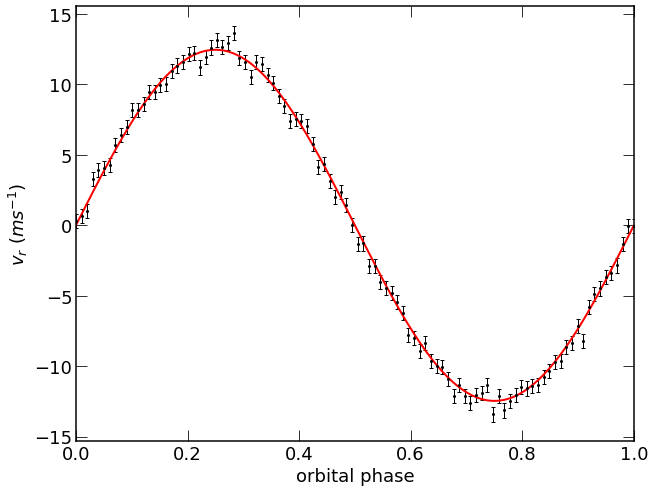

In [110]:
fig, ax = plt.subplots(figsize=(10,8))
ax.errorbar(phi, RV_sim.value, yerr=yerr, color='k', fmt='.', markersize=4, elinewidth=1, capsize=2)
ax.plot(phi, RV_true.value, 'r', linewidth=2)
ax.set_ylabel("$v_r$ ($m  s^{-1}$)")
ax.set_xlabel("orbital phase")
ax.set_xlim(phi[0], phi[-1])